In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

# Generate dataset
X = np.random.rand(200, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)

# Convert to DataFrame
data = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])
data["Target"] = y

data.head()

,Feature_1,Feature_2,Target
0,0.374540,0.950714,1
1,0.731994,0.598658,1
2,0.156019,0.155995,0
3,0.058084,0.866176,0
4,0.601115,0.708073,1


In [3]:
data.to_csv("neural_network_dataset.csv", index=False)
data = pd.read_csv("neural_network_dataset.csv")

In [4]:
X = data[["Feature_1", "Feature_2"]].values
y = data["Target"].values.reshape(-1, 1)

In [5]:
input_neurons = 2
hidden_neurons = 4
output_neurons = 1
learning_rate = 0.1
epochs = 1000

# Weight initialization
W1 = np.random.randn(input_neurons, hidden_neurons)
b1 = np.zeros((1, hidden_neurons))

W2 = np.random.randn(hidden_neurons, output_neurons)
b2 = np.zeros((1, output_neurons))

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

In [7]:
losses = []

for epoch in range(epochs):
    # Forward Propagation
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    
    z2 = np.dot(a1, W2) + b2
    y_hat = sigmoid(z2)
    
    # Loss (Binary Cross Entropy)
    loss = np.mean((y - y_hat) ** 2)
    losses.append(loss)
    
    # Backpropagation
    error = y - y_hat
    d_output = error * sigmoid_derivative(y_hat)
    
    error_hidden = d_output.dot(W2.T)
    d_hidden = error_hidden * sigmoid_derivative(a1)
    
    # Update weights and biases
    W2 += a1.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    
    W1 += X.T.dot(d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

print("Training completed.")

Training completed.


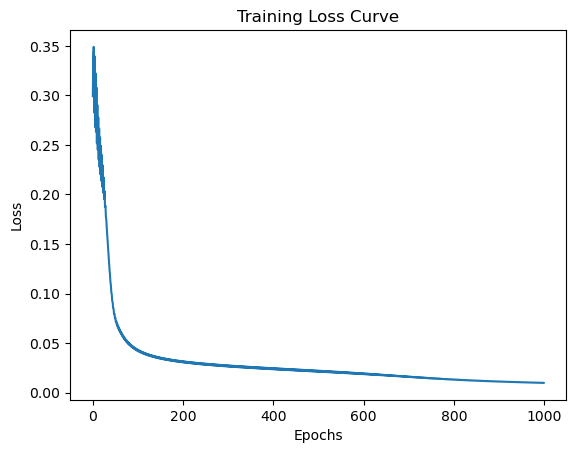

In [8]:
plt.figure()
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

In [9]:
predictions = (y_hat > 0.5).astype(int)
accuracy = np.mean(predictions == y)
print("Accuracy:", accuracy)

Accuracy: 0.995


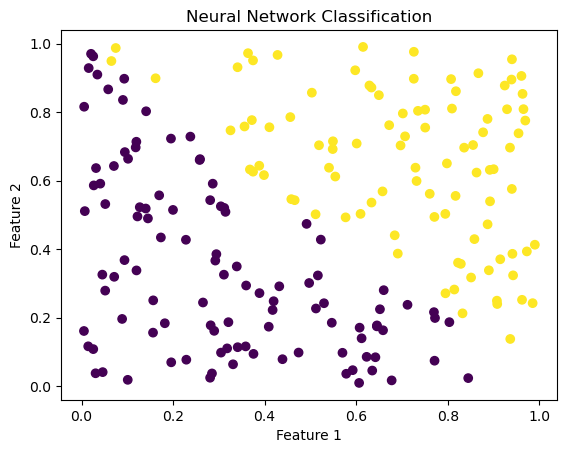

In [10]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y.flatten())
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Neural Network Classification")
plt.show()